In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The flow properties are:

In [13]:
U = 0.5             # m/s
fr = 10*60*0.001    # m3/s
fs = 13.39*1000     # Hz
tr = 0.007          # s

L = 1               # m
mu_c = 1*10**-3     # Pa s
rho_c = 1*10**3     # kg/m3

The bubble properties are:

In [14]:
Ub = 1.2 * U       # m/s
rho_a = 1.293      # kg/m3 (@ 20°C)

The Reynolds number is given by $$\rm{Re} = \frac{\rho_c U L}{\mu},$$ where $\mu$ is the viscosity of water (at room temperature, approximately equal to $1\times 10^{-6} \text{m}^2/\text{s}$).

In [7]:
Re = rho_c * U * L / mu_c
print(Re)

500000.0


The Morton number is given by $$\rm{Mo}=\frac{g \mu_c^4 \Delta\rho}{\rho_c^2 \sigma^3}$$

In [15]:
g = 9.81              # m/s2
sigma = 72.8 * 10**-3 # N/m (https://www.nanoscience.com/techniques/tensiometry/surface-and-interfacial-tension/)

Mo = g * mu_c**4 * (rho_c - rho_a) / (rho_c**2 * sigma**3)
print(np.log10(Mo))

-10.595287036674904


Finally, the Bond (or Eötvös) number is $$\rm{Bo} = \frac{\Delta\rho g L^2}{\sigma}$$

In [19]:
Bo = (rho_c - rho_a) * g * L**2 / sigma

print(Bo)

-134578.51195054944


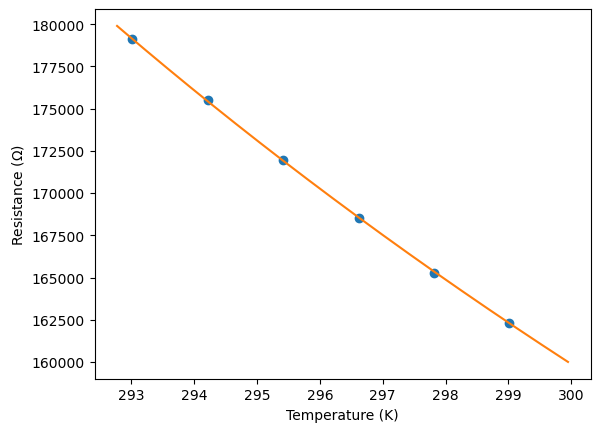

In [16]:
# Import ThermExperCalib.csv
[T_cal, R_cal] = np.split(np.loadtxt('Data/ThermExperCalib.csv', delimiter=','), 2, axis=1)

# Plot the data
plt.plot(T_cal, R_cal, 'o')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance ($\Omega$)')

# Fit the Steinhart-Hart equation to the datapoints
def steinhart_hart(R, A, B, C):
    return (A + B * np.log(R) + C * np.log(R)**3)

def calc_temp(R, A, B, C):
    return 1/steinhart_hart(R, A, B, C)

[A, B, C] = curve_fit(steinhart_hart, data_cal[:,1], 1/data_cal[:,0])[0]


R_test = range(160000,180000, 100)
plt.plot(calc_temp(R_test, A, B, C), R_test)
plt.show()

In [19]:
# Import data with and without bubbles
R_bub = np.loadtxt('Data/ThermBubData.csv', delimiter=',')
R_nobub = np.loadtxt('Data/ThermNoBubData.csv', delimiter=',')

T_bub = calc_temp(R_bub, A, B, C)
T_nobub = calc_temp(R_nobub, A, B, C)

# Plot the data